In [1]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [3]:
# Load the dataset
df = pd.read_csv("/content/wine.csv")

# Display the first few rows
print(df.head())

# Check dataset info
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

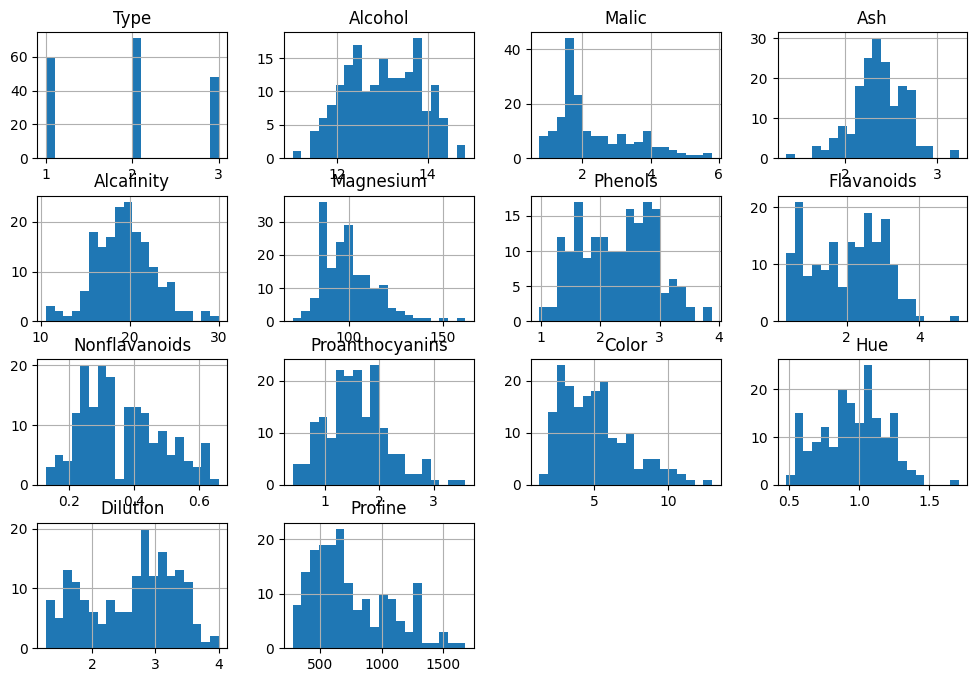

In [4]:
# Plot histograms for all features
df.hist(figsize=(12, 8), bins=20)
plt.show()


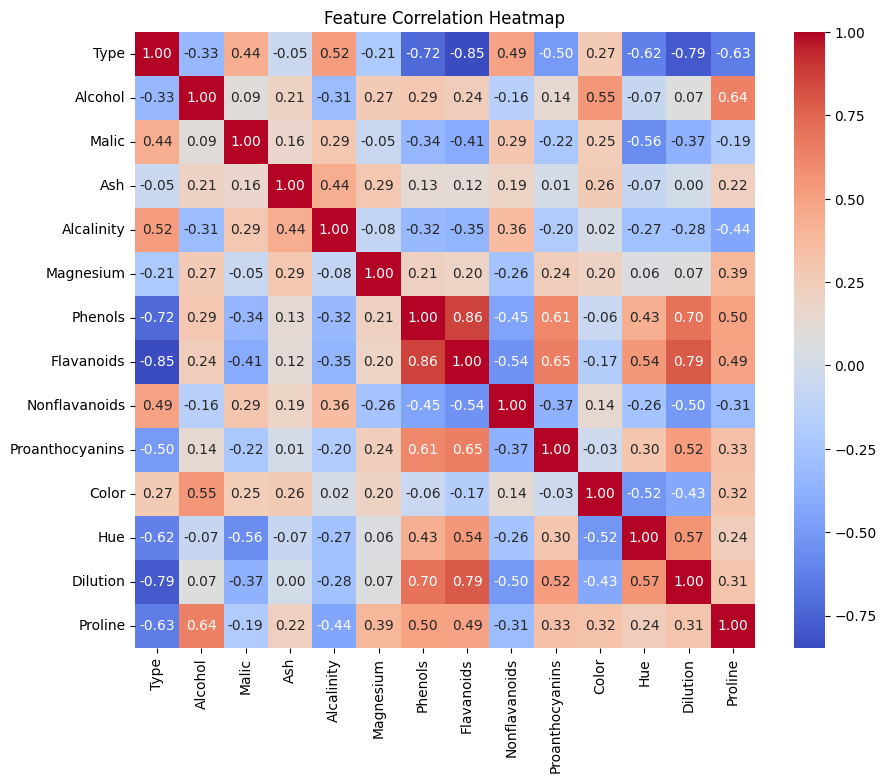

In [5]:
# Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
# Drop the target column if present
X = df.drop(columns=['target'], errors='ignore')

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.39542486 0.17836259]


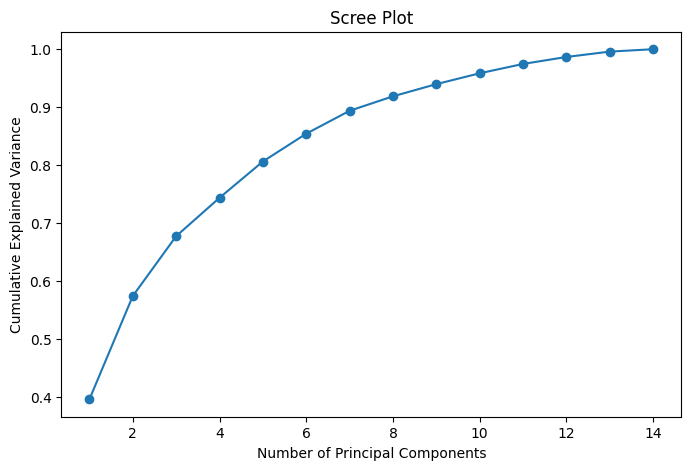

In [8]:
pca_full = PCA()
pca_full.fit(X_scaled)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(X.columns) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [9]:
# Apply KMeans clustering to original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)

# Evaluate clustering
silhouette_orig = silhouette_score(X_scaled, clusters_orig)
davies_bouldin_orig = davies_bouldin_score(X_scaled, clusters_orig)

print(f"Original Data - Silhouette Score: {silhouette_orig:.2f}")
print(f"Original Data - Davies-Bouldin Index: {davies_bouldin_orig:.2f}")


Original Data - Silhouette Score: 0.31
Original Data - Davies-Bouldin Index: 1.32


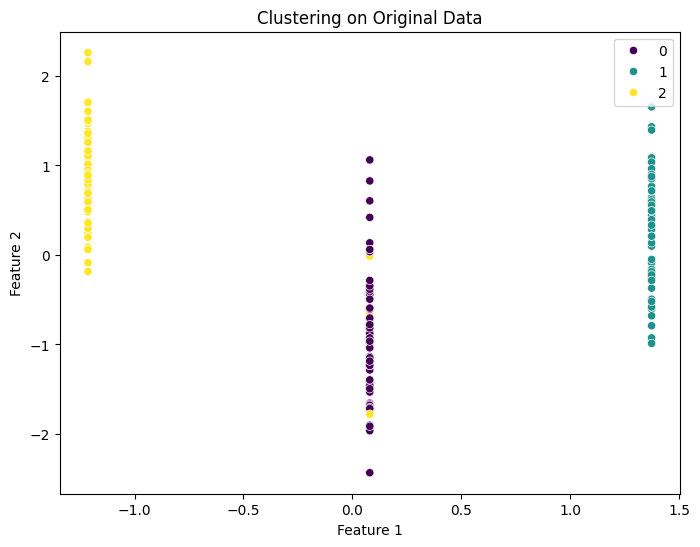

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters_orig, palette='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clustering on Original Data")
plt.show()


In [11]:
# Apply KMeans clustering to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Evaluate clustering
silhouette_pca = silhouette_score(X_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(X_pca, clusters_pca)

print(f"PCA Data - Silhouette Score: {silhouette_pca:.2f}")
print(f"PCA Data - Davies-Bouldin Index: {davies_bouldin_pca:.2f}")


PCA Data - Silhouette Score: 0.60
PCA Data - Davies-Bouldin Index: 0.54


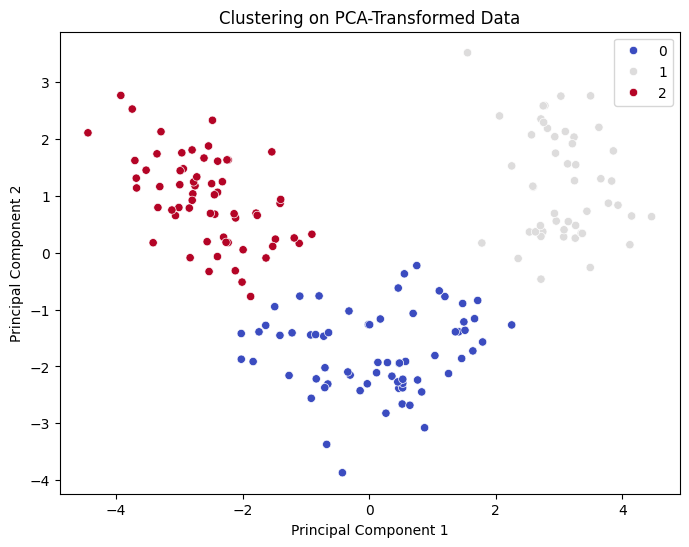

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=clusters_pca, palette='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering on PCA-Transformed Data")
plt.show()


In [13]:
print("Comparison of Clustering Performance:")
print(f"Original Data - Silhouette Score: {silhouette_orig:.2f}, Davies-Bouldin Index: {davies_bouldin_orig:.2f}")
print(f"PCA Data - Silhouette Score: {silhouette_pca:.2f}, Davies-Bouldin Index: {davies_bouldin_pca:.2f}")


Comparison of Clustering Performance:
Original Data - Silhouette Score: 0.31, Davies-Bouldin Index: 1.32
PCA Data - Silhouette Score: 0.60, Davies-Bouldin Index: 0.54
